In [1]:
#import required package: pandas, pyplot, numpy
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

In [3]:
#import data 
df = pd.read_csv("datasets/FuelConsumption.csv")

In [6]:
#show the top 5 row of the data
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [8]:
# show the standard attribute of the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [12]:
#Selected Columns of the datasets
cdf = df[['ENGINESIZE','CYLINDERS','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,CO2EMISSIONS
0,2.0,4,196
1,2.4,4,221
2,1.5,4,136
3,3.5,6,255
4,3.5,6,244


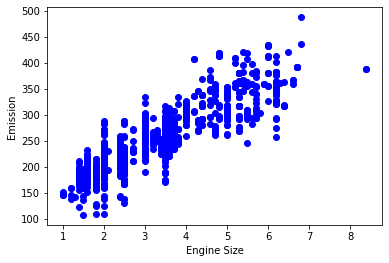

In [18]:
#draw the scatter graph between two attributes, which can show the relationships of the two variables 
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

In [20]:
#setup the training and testing group
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [25]:
# use polynomialFeatures() functions from Scikit Learn Library
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

poly = PolynomialFeatures(degree = 2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24]])

In [53]:
clf = linear_model.LinearRegression()
clf.fit(train_x_poly, train_y)

print('Coefficients: ', clf.coef_)
print('Intercept: ', clf.intercept_)


Coefficients:  [[ 0.         48.07430007 -1.19157706]]
Intercept:  [111.15966116]


Text(0, 0.5, 'Emissions')

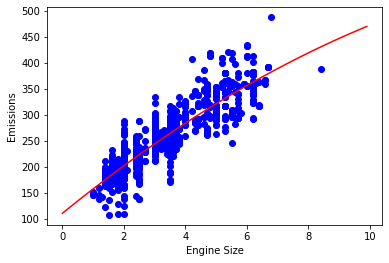

In [54]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1] * XX + clf.coef_[0][2] * np.power(XX, 2) 
plt.plot(XX, yy, '-r')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')

In [55]:
#Evaluation
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean Absolute Error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares(MSE): %.2f" %np.mean((test_y - test_y_) ** 2))
print("R2-score: %.2f" % r2_score(test_y_, test_y))

Mean Absolute Error: 23.84
Residual sum of squares(MSE): 975.97
R2-score: 0.70


Coefficients:  [[ 0.         44.68884227 -2.75231067  0.74456059 -0.07127518]]
Intercept:  [119.10298781]
Mean Absolute Error: 22.15
Residual sum of squares(MSE): 856.04
R2-score: 0.74


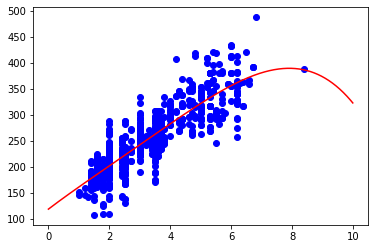

In [87]:
#Editting the above model to fit a degress 4 polynominal model

#setup the training and testing group
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

train_x = train[["ENGINESIZE"]]
train_y = train[["CO2EMISSIONS"]]

test_x = test[["ENGINESIZE"]]
test_y = test[["CO2EMISSIONS"]]

# use polynomialFeatures() functions from Scikit Learn Library
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly = PolynomialFeatures(degree = 4)
train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()
clf.fit(train_x_poly,train_y)

print('Coefficients: ', clf.coef_)
print('Intercept: ', clf.intercept_)

#draw the training model line with training data
plt.scatter(train_x, train_y, color='blue')
XX = np.arange(0,10,0.01)
yy = clf.intercept_[0] + clf.coef_[0][1]*XX + clf.coef_[0][2]*np.power(XX,2) + clf.coef_[0][3]*np.power(XX,3) +clf.coef_[0][4]*np.power(XX,4)
plt.plot(XX,yy,color='red')

#Evaluation
from sklearn.metrics import r2_score
test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)


print("Mean Absolute Error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares(MSE): %.2f" %np.mean((test_y - test_y_) ** 2))
print("R2-score: %.2f" % r2_score(test_y_, test_y))